## Primary Questions(s):

1. Does length of reviews affect current grade? To explore this, we can perform 2 sample t-tests between each grade combination.  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels
%matplotlib inline

In [3]:
restaurants_path = 'restaurant_inspections.csv'
establishments_path = 'restaurant_establishments.csv'
violations_path = 'restaurant_violations.csv'
categories_path = 'restaurant_categories.csv'
cities_path = 'restaurant_cities.csv'

In [4]:
cdf = pd.read_csv(cities_path, sep = ';', index_col = 0)
cdf.drop(cdf.columns[cdf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#cdf.dropna(how='all', axis='columns')
c_dict = dict(cdf)

In [5]:
edf = pd.read_csv(establishments_path, sep=';', header=0)
edf.drop(edf.columns[edf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
edf = edf[edf['current_grade'].notna()]


In [6]:
business_json_path = 'yelp_academic_dataset_business.json'
#review_json_path = 'yelp_academic_dataset_review.json'
bdf = pd.read_json(business_json_path, lines = True)
#rdf = pd.read_json(review_json_path, lines = True)

In [7]:
combined_df = bdf.merge(edf, how = 'inner', left_on = ['address', 'city'], right_on = ['address', 'city_name'])
combined_df = combined_df.dropna(how='all')
#combined_df.info()

In [15]:
combined_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude_x,longitude_x,name,...,zip_code,nciaa,plan_review,record_status,current_grade,current_demerits,date_current,previous_grade,date_previous,search_text
0,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub
1,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,...,89156-7801,Y,NaN,1,A,6.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S to Go PTS to Go
2,6055 E Lake Mead Blvd,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",QWgGaMiZ7XxaJ6NMDCSthg,"New Mexican Cuisine, Restaurants",Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.195615,-115.040529,El Rey Del Machete,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub
3,6055 E Lake Mead Blvd,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",QWgGaMiZ7XxaJ6NMDCSthg,"New Mexican Cuisine, Restaurants",Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.195615,-115.040529,El Rey Del Machete,...,89156-7801,Y,NaN,1,A,6.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S to Go PTS to Go
4,6055 E Lake Mead Blvd,"{'RestaurantsPriceRange2': '2', 'OutdoorSeatin...",YoJt2bvCrYMSSyoeUO-YTg,"Sports Bars, Pubs, Nightlife, Bars, Restaurant...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.195615,-115.040529,PT's,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub


In [9]:
DIR = 'C:/Users/Lam/Documents/DCS/Capstone 1 Projects/Yelp Inspection Project'
FILE = '/yelp_review.csv'

file = '{}{}'.format(DIR, FILE)

print('File directory: {}'.format(file))

File directory: C:/Users/Lam/Documents/DCS/Capstone 1 Projects/Yelp Inspection Project/yelp_review.csv


In [10]:
null_df = pd.DataFrame([])

for chunk in pd.read_csv(file, chunksize=100000):
    final_df = pd.merge(combined_df, chunk, how = 'inner', left_on = ['business_id'], right_on = ['business_id'])
    null_df = null_df.append(final_df, ignore_index=True)
    null_df.drop_duplicates(subset = "review_id", inplace=True)
    print(null_df.shape)
    #print(final_df.head())

(8651, 42)
(17600, 42)
(26300, 42)
(34954, 42)
(43673, 42)
(52140, 42)
(61095, 42)
(70004, 42)
(78866, 42)
(87791, 42)
(96274, 42)
(105423, 42)
(114497, 42)
(123567, 42)
(132522, 42)
(141670, 42)
(150433, 42)
(159239, 42)
(168462, 42)
(177372, 42)
(186132, 42)
(194668, 42)
(203347, 42)
(212541, 42)
(221267, 42)
(230073, 42)
(238554, 42)
(247105, 42)
(255886, 42)
(264588, 42)
(273371, 42)
(282188, 42)
(290609, 42)
(299202, 42)
(307612, 42)
(316499, 42)
(325295, 42)
(334368, 42)
(343333, 42)
(352160, 42)
(360990, 42)
(369535, 42)
(378271, 42)
(386549, 42)
(395373, 42)
(403985, 42)
(412575, 42)
(421617, 42)
(430382, 42)
(439163, 42)
(447518, 42)
(456019, 42)
(461358, 42)


In [11]:
null_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude_x', 'longitude_x', 'name', 'postal_code',
       'review_count', 'stars_x', 'state', 'permit_number', 'facility_id',
       'owner_id', 'PE', 'restaurant_name', 'location_name', 'latitude_y',
       'longitude_y', 'city_id', 'city_name', 'zip_code', 'nciaa',
       'plan_review', 'record_status', 'current_grade', 'current_demerits',
       'date_current', 'previous_grade', 'date_previous', 'search_text',
       'review_id', 'user_id', 'stars_y', 'date', 'text', 'useful', 'funny',
       'cool'],
      dtype='object')

In [12]:
shortened_columns = ['business_id', 'name', 'address', 'postal_code', 'current_grade', 'current_demerits', 'date_current','review_id','text','stars_y']

In [13]:
story_df = null_df[shortened_columns]
story_df['review length'] = story_df['text'].apply(len)

C:\Users\Lam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
story_df.head()

,business_id,name,address,postal_code,current_grade,current_demerits,date_current,review_id,text,stars_y,review length
0,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,pUpR94RE8Ld9FcmJ7ByxJg,Legit Mexican food from a small homey shop.\nW...,5,1328
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,FNKLKqez8KWqyWB_WJOjow,"México lindo y querido, si muero lejos de ti, ...",5,3471
2,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,8ILxnnktxFKSEXWcj_-6kg,By far the best Mexican Restaurant I've been t...,5,306
3,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,FeF7GfYMkY5pcvm81uh14g,Anyplace that serves margaritas in pint mugs i...,4,289
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,eYJWULNbAek-KrKdMnEMEg,We enjoy eating at this Mexican Restaurant a c...,4,518


In [16]:
story_df.describe()

,current_demerits,stars_y,review length
count,461358.000000,461358.000000,461358.000000
mean,4.460053,3.573383,634.580367
std,4.152133,1.443918,599.478646
min,0.000000,1.000000,3.000000
25%,0.000000,3.000000,243.000000
50%,4.000000,4.000000,444.000000
75%,8.000000,5.000000,813.000000
max,61.000000,5.000000,5039.000000


In [24]:
A_df = story_df[story_df['current_grade'] == 'A']
A_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454810 entries, 0 to 697176
Data columns (total 11 columns):
business_id         454810 non-null object
name                454810 non-null object
address             454810 non-null object
postal_code         454810 non-null object
current_grade       454810 non-null object
current_demerits    454810 non-null float64
date_current        454810 non-null object
review_id           454810 non-null object
text                454810 non-null object
stars_y             454810 non-null int64
review length       454810 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 41.6+ MB


In [30]:
A_mean = A_df['current_demerits'].mean()
A_std = A_df['current_demerits'].std()
A_revmean = A_df['review length'].mean()
A_revstd= A_df['review length'].std()
A_df.describe()

,current_demerits,stars_y,review length
count,454810.000000,454810.000000,454810.000000
mean,4.207630,3.575711,634.667846
std,3.436696,1.443274,599.629672
min,0.000000,1.000000,3.000000
25%,0.000000,3.000000,243.000000
50%,4.000000,4.000000,444.000000
75%,8.000000,5.000000,813.000000
max,31.000000,5.000000,5039.000000


In [25]:
B_df = story_df[story_df['current_grade'] == 'B']
B_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 1959 to 696327
Data columns (total 11 columns):
business_id         3939 non-null object
name                3939 non-null object
address             3939 non-null object
postal_code         3939 non-null object
current_grade       3939 non-null object
current_demerits    3939 non-null float64
date_current        3939 non-null object
review_id           3939 non-null object
text                3939 non-null object
stars_y             3939 non-null int64
review length       3939 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 369.3+ KB


In [31]:
B_mean = B_df['current_demerits'].mean()
B_std = B_df['current_demerits'].std()
B_revmean = B_df['review length'].mean()
B_revstd= B_df['review length'].std()
B_df.describe()

,current_demerits,stars_y,review length
count,3939.000000,3939.000000,3939.000000
mean,18.763392,3.322417,661.187357
std,2.662851,1.490322,611.488396
min,8.000000,1.000000,26.000000
25%,20.000000,2.000000,257.000000
50%,20.000000,4.000000,471.000000
75%,20.000000,5.000000,843.000000
max,20.000000,5.000000,4997.000000


In [26]:
C_df = story_df[story_df['current_grade'] == 'C']
C_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 3416 to 697007
Data columns (total 11 columns):
business_id         1605 non-null object
name                1605 non-null object
address             1605 non-null object
postal_code         1605 non-null object
current_grade       1605 non-null object
current_demerits    1605 non-null float64
date_current        1605 non-null object
review_id           1605 non-null object
text                1605 non-null object
stars_y             1605 non-null int64
review length       1605 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 150.5+ KB


In [32]:
C_mean = C_df['current_demerits'].mean()
C_std = C_df['current_demerits'].std()
C_revmean = C_df['review length'].mean()
C_revstd= C_df['review length'].std()
C_df.describe()

,current_demerits,stars_y,review length
count,1605.000000,1605.000000,1605.000000
mean,30.350156,3.557009,585.855452
std,5.161072,1.411132,551.976527
min,20.000000,1.000000,27.000000
25%,27.000000,3.000000,231.000000
50%,31.000000,4.000000,415.000000
75%,36.000000,5.000000,752.000000
max,36.000000,5.000000,4972.000000


In [27]:
X_df = story_df[story_df['current_grade'] == 'X']
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 3964 to 693285
Data columns (total 11 columns):
business_id         1004 non-null object
name                1004 non-null object
address             1004 non-null object
postal_code         1004 non-null object
current_grade       1004 non-null object
current_demerits    1004 non-null float64
date_current        1004 non-null object
review_id           1004 non-null object
text                1004 non-null object
stars_y             1004 non-null int64
review length       1004 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 94.1+ KB


In [33]:
X_mean = X_df['current_demerits'].mean()
X_std = X_df['current_demerits'].std()
X_revmean = X_df['review length'].mean()
X_revstd= X_df['review length'].std()
X_df.describe()

,current_demerits,stars_y,review length
count,1004.000000,1004.000000,1004.000000
mean,21.302789,3.529880,568.457171
std,17.751580,1.515656,545.657454
min,0.000000,1.000000,18.000000
25%,0.000000,2.000000,213.750000
50%,17.000000,4.000000,386.000000
75%,25.000000,5.000000,721.750000
max,61.000000,5.000000,4671.000000


## Distribution of A

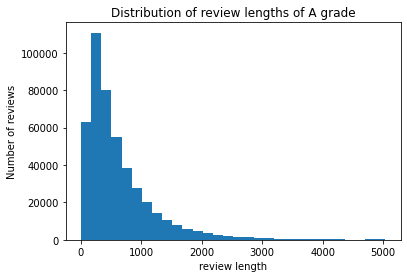

In [48]:
_ = plt.hist(A_df['review length'], bins=30)
_ = plt.xlabel('review length')
_ = plt.ylabel('Number of reviews')
_ = plt.title('Distribution of review lengths of A grade')

## Distribution of B

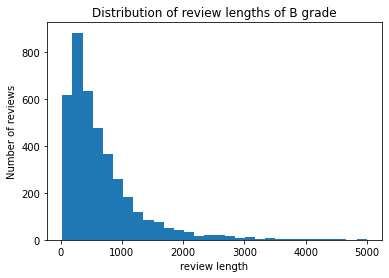

In [55]:
_ = plt.hist(B_df['review length'], bins=30)
_ = plt.xlabel('review length')
_ = plt.ylabel('Number of reviews')
_ = plt.title('Distribution of review lengths of B grade')

## Distribution of C

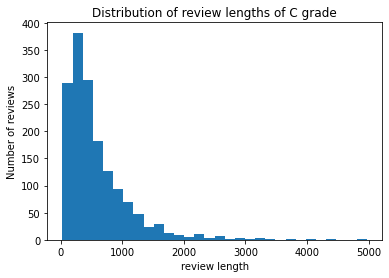

In [56]:
_ = plt.hist(C_df['review length'], bins=30)
_ = plt.xlabel('review length')
_ = plt.ylabel('Number of reviews')
_ = plt.title('Distribution of review lengths of C grade')

## Distribution of X

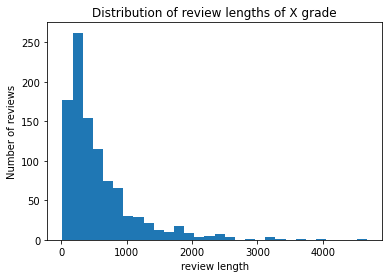

In [58]:
_ = plt.hist(X_df['review length'], bins=30)
_ = plt.xlabel('review length')
_ = plt.ylabel('Number of reviews')
_ = plt.title('Distribution of review lengths of X grade')

## A vs. B

Null Hypothesis: Mean of A reviews = Mean of B reviews

Alternate Hypothesis: Mean of A reviews != Mean of B reviews

In [40]:
stats.ttest_ind(A_df['review length'], B_df['review length'])

Ttest_indResult(statistic=-2.763302199270396, pvalue=0.005722204191441517)

R: As the p-value is < 0.05, I can reject the null hypothesis that the means of A reviews and means of B reviews are equal. 

## A vs. C

Null Hypothesis: Mean of A reviews = Mean of C reviews

Alternate Hypothesis: Mean of A reviews != Mean of C reviews

In [39]:
stats.ttest_ind(A_df['review length'], C_df['review length'])

Ttest_indResult(statistic=3.256387405043191, pvalue=0.0011284790162638732)

R: As the p-value is < 0.05, I can reject the null hypothesis that the means of A reviews and means of C reviews are equal. 

## A vs. X

Null Hypothesis: Mean of A reviews = Mean of X reviews

Alternate Hypothesis: Mean of A reviews != Mean of X reviews

In [41]:
stats.ttest_ind(A_df['review length'], X_df['review length'])

Ttest_indResult(statistic=3.4955465340603546, pvalue=0.00047313688124454894)

R: As the p-value < 0.05, I can reject the null hypothesis that the means of A reviews and means of X reviews are equal. 

## B vs. C

Null Hypothesis: Mean of B reviews = Mean of C reviews

Alternate Hypothesis: Mean of B reviews != Mean of C reviews

In [43]:
stats.ttest_ind(B_df['review length'], C_df['review length'])

Ttest_indResult(statistic=4.276327402012331, pvalue=1.931952920595817e-05)

R: As the p-value < 0.05, I can reject the null hypothesis that the means of B reviews and means of C reviews are equal. 

## B vs. X

Null Hypothesis: Mean of B reviews = Mean of X reviews

Alternate Hypothesis: Mean of B reviews != Mean of X reviews

In [45]:
stats.ttest_ind(B_df['review length'], X_df['review length'])

Ttest_indResult(statistic=4.380952469594762, pvalue=1.2060810007820117e-05)

R: As the p-value < 0.05, I can reject the null hypothesis that the means of B reviews and means of X reviews are equal. 

## C vs. X

Null Hypothesis: Mean of C reviews = Mean of X reviews

Alternate Hypothesis: Mean of C reviews != Mean of X reviews

In [47]:
stats.ttest_ind(C_df['review length'], X_df['review length'])

Ttest_indResult(statistic=0.7867981187165051, pvalue=0.4314715709457597)

R: As the p-value > 0.05, I cannot reject the null hypothesis that the means of X reviews and means of X reviews are equal. 

R: It seems that all grades with the exception of C vs. X are expected to have different mean lengths for reviews. It is not unexpected that C and X have similar review lengths as a C grade is on the border of failing an inspection. 

## Distribution of Grades

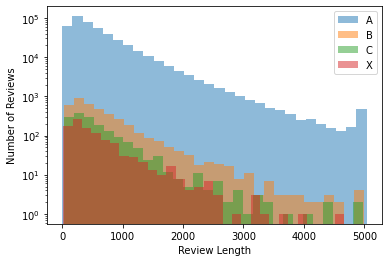

In [59]:
_ = plt.hist(A_df['review length'], bins=30, alpha=0.5, label='A')
_ = plt.hist(B_df['review length'], bins=30, alpha=0.5, label='B')
_ = plt.hist(C_df['review length'], bins=30, alpha=0.5, label='C')
_ = plt.hist(X_df['review length'], bins=30, alpha=0.5, label='X')
_ = plt.xlabel('Review Length')
_ = plt.ylabel('Number of Reviews')
_ = plt.yscale('log')
_ = plt.legend()